In [1]:
import csv

In [2]:
from sklearn import svm, metrics
from numpy import genfromtxt
import numpy as np

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
import sys

In [16]:
warnings.filterwarnings('ignore')
DeprecationWarning('ignore')
os.chdir('C:\\Users\\Sangamesh\\Desktop\\ibm')

In [17]:
df = pd.read_csv('mnist_train.csv')

In [18]:
df.tail()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x = df.drop(['label'], axis = 1).values
y = df['label'].values

In [20]:
digit = x[65]
digit


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

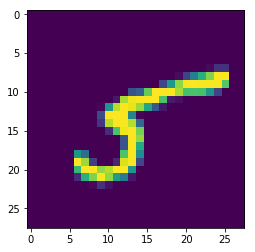

In [21]:
somedigit = digit.reshape(28,28)
plt.imshow(somedigit)

In [28]:
def splitxy(df):
        x=df.drop(['label'], axis=1)
        y=df['label']
        return x, y

In [29]:
classifier = svm.LinearSVC()
train,test= train_test_split(df, test_size=0.2, random_state=2)
x_train, y_train=splitxy(train)
x_test, y_test=splitxy(test)

In [30]:
classifier.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [31]:
predicted = classifier.predict(x_test)

In [32]:
 metrics.confusion_matrix(y_test, predicted)

array([[1138,    0,    6,    2,    0,   31,    0,    1,    4,    1],
       [   4, 1278,    6,    1,    8,   13,    1,   15,   23,    5],
       [  25,   12,  929,   20,   14,   49,    5,   33,  101,    6],
       [  30,    4,   34,  922,    2,  136,    0,   41,   63,   20],
       [   7,    2,    5,    3, 1085,    5,    3,   24,   30,   53],
       [  28,    2,    9,    9,    6,  960,    2,   13,   44,   10],
       [  33,    6,   28,    1,   42,  118,  888,    0,   53,    0],
       [   8,    1,    2,    2,   13,    5,    0, 1152,    8,   29],
       [  18,   21,    6,    9,    6,  113,    1,   26,  953,   13],
       [  12,    1,    2,    7,   55,   17,    0,  160,   25,  883]],
      dtype=int64)

In [34]:
score=accuracy_score(y_test,predicted)
print(score)

0.849
